# Intuitive approach to modeling stock prices

Let's assume we were trying to figure out how to mathematically model the movement of stock prices. To start, it could help to look at cash equivalents.\
How does cash evolve under time? Given an interest rate or *risk-free rate* $r$, we may know that our cash amount grows by $r$ every year.\
More generally, we can define a rate $r$ per any time unit $dt$, and if $X$ denotes the growing quantity (for instance cash), the increase in $X$ we receive per time unit is given by $dX$:
$$
dX = r X dt.
$$
The notation style is chosen on purpose, because it implies a differential equation.\
After separating the variables ($X$ and $t$), this equation can be easily integrated and we achieve an equation for continuous compounding:
$$
X(t) = X_0 e^{rt}
$$
Going back to stocks, we could make the assumption that stocks also grow at a constant rate per time unit and simply use the above result. But that's not very realistic.\
To make it more realistic, we need to add some fluctuations:
$$
dS = \mu S dt + \sigma S dW,
$$
where now $S$ is the stock price, $\mu$ is a constant growth rate, $dW$ are small fluctuations, and $\sigma$ is a scaling factor. Note that fluctuations are scaled to current stock price.\
How should these fluctuations $dW$ look like? A good approach is to choose random fluctuations or rather a stochastic process. A common choice is the **Wiener process** $W$.\
So let's try to integrate this equation again.

## The Wiener process and why classical integration fails

At first sight, the equation $\dfrac{dS}{S} = \mu dt + \sigma dW$ seems like it should be integratable as we know it. However, the stochastic nature of the equation brings complexity.\
A sufficient condition to use the Riemann-Stieltjes integral is that the integrator, here $W$, is of *bounded variation*, which means $W$ needs to have finite total variation. And this is exactly the problem.\
Let's look at the total variation of $W$ over the interval $[0, T]$. We partition the interval into $n$ equidistant subintervals of length $\Delta t = T/n$. The total variation is then:
$$
V(W) = \lim_{n\to\infty} \sum\limits_{i=0}^{n-1} |\Delta W_i| = \lim_{n\to\infty} \sum\limits_{i=0}^{n-1} | W((i+1)\Delta t) - W(i \Delta t)|
$$
Now, a defining property of the Wiener process is that its increments are Gaussian distributed $W((i+1)\Delta t) - W(i \Delta t) \propto \mathcal{N}(0, \Delta t) = \sqrt{\Delta t}\mathcal{N}(0, 1)$. We can use that and get:
$$
V(W) = \lim_{n\to\infty} \sqrt{\Delta t}\sum\limits_{i=0}^{n-1} |Z_i|,
$$
where $Z_i$ are independent and identical distributed standard normal distributions. We insert a multiplicative 1 and use the strong law of large numbers:
$$
V(W) = \lim_{n\to\infty} \sqrt{\Delta t}n \left(\dfrac{1}{n}\sum\limits_{i=0}^{n-1} |Z_i|\right) = \lim_{n\to\infty} \sqrt{\Delta t}n E[|Z|] = \lim_{n\to\infty} \sqrt{\Delta t}n \sqrt{\dfrac{2}{\pi}} = \lim_{n\to\infty} \sqrt{Tn}\sqrt{\dfrac{2}{\pi}} \to \infty
$$
And now the problem is already apparent: as we make the partition finer ($n \to \infty$), the total variation $V$ is infinite (growing as $\sqrt{n}$) and thus, we cannot apply the Riemann-Stieltjes integral, specifically
$$
\int dW \neq W + c,
$$
in the Riemann-Stieltjes sense. This itself is not a problem as Itô's calculus lets us solve this integral. Where it becomes tricky is the part $\int \sigma S dW$, as here, integrator and integrand depend on the same stochastic process. \
To solve this issue we can either use Itô's Lemma, or we can use a little trick (which boils down to Itô's Lemma). Since we can't directly integrate $\dfrac{dS}{S} = \mu dt + \sigma dW$, let's look at $d\ln{S}$, that is a small increment of $\ln{S}$. We use the Taylor expansion:
$$
d\ln{S} = \dfrac{1}{S} dS - \dfrac{1}{2S^2} dS^2 + \mathcal{O}(dS^3)
$$
and we replace $dS = \mu S dt + \sigma S dW$:
$$
d\ln{S} =  \mu dt + \sigma dW - \dfrac{1}{2S^2} \left( \mu^2 S^2 dt^2 + 2 \mu \sigma S^2 dt dW + \sigma^2 S^2 dW^2 \right)
$$
Here, terms with $dt^2$ vanish faster than $dt$ and can be neglected. Similarly $dt dW \propto dt \sqrt{dt}$ vanishes faster as well. However, for $dW^2$, we can look at the quadratic variation:
$$
[W]_T = \lim_{n\to\infty}\sum\limits_{i=0}^{n-1} (\Delta W_i)^2 = \lim_{n\to\infty}\Delta t n \left( \dfrac{1}{n}\sum\limits_{i=0}^{n-1} Z_i^2\right) = \lim_{n\to\infty}\Delta t n E[Z^2] = \lim_{n\to\infty}\Delta t n = T < \infty
$$
that means the quadratic variation is finite, and moreover $dW^2 = dt$, because $\lim_{n\to\infty}\sum\limits_{i=0}^{n-1} (\Delta W)^2 = T = \lim_{n\to\infty}\sum\limits_{i=0}^{n-1} \Delta t$. Inserting this into our equation gives:
$$
d\ln{S} = (\mu - \dfrac{1}{2} \sigma^2) dt + \sigma dW
$$
which now can be integrated in the Itô sense to yield:
$$
\ln{S} + c = (\mu - \dfrac{1}{2} \sigma^2) t + \sigma W
$$
for the log of the stock price, where $c = -\ln{S_0}$ commonly. We can exponentiate to find:
$$
S(t) = S_0 e^{(\mu - \dfrac{1}{2} \sigma^2) t + \sigma W}
$$

## The log-normal distribution and Geometric Brownian Motion

When we inspect the log equation of stock price time evolution and we build the difference between price at time $0$ and $t$, we find:
$$
\ln{S(t)} - \ln{S_0} = \ln{S_0} + (\mu - \dfrac{1}{2} \sigma^2) t + \sigma W(t) - (\ln{S_0} + \sigma W(0))
$$
and after re-arranging:
$$
\ln{S(t)} = \ln{S_0} + (\mu - \dfrac{1}{2} \sigma^2) t + \sigma (W(t) - W(0)).
$$
Note: We could have just introduced $W(0)$, since a property of the Wiener process is $W(0)= 0$. \
Again we can use the property that $W(\tau + \Delta t) - W(\tau) \propto \sqrt{\Delta t}\mathcal{N}(0, 1)$, such that we can write:
$$
\ln{S(t)} = \ln{S_0} + (\mu - \dfrac{1}{2} \sigma^2) t + \sigma \sqrt{t}\mathcal{N}(0, 1).
$$
which makes it apparent that the log of the stock price $S(t)$ is normally distributed. Equivalently, the stock price is log-normal distributed. Using the properties of the normal distribution, we can directly derive:
$$
E \left[\ln{S(t)}\right] = \ln{S_0} + (\mu - \dfrac{1}{2} \sigma^2) t
$$
and
$$
Var\left[\ln{S(t)}\right] = \sigma^2 t.
$$
Similarly, from $S(t) = S_0 e^{(\mu - \dfrac{1}{2} \sigma^2) t + \sigma W}$, using the properties of a log-normal distribution, we can derive:
$$
E[S(t)] = S_0 e^{\mu t}
$$
and
$$
Var[S(t)] = S_0^2 e^{2\mu t} \left(e^{\sigma^2t} - 1\right).
$$

This kind of time evolution of the stock price is also called **Geometric Brownian Motion (GBM)**. An alternative to GBM is **Arithmetic Brownian Motion (ABM)**, where the noise term is additive rather than multiplicative. ABM is mathematically simpler but unsuitable for modeling stock prices because it allows negative values.

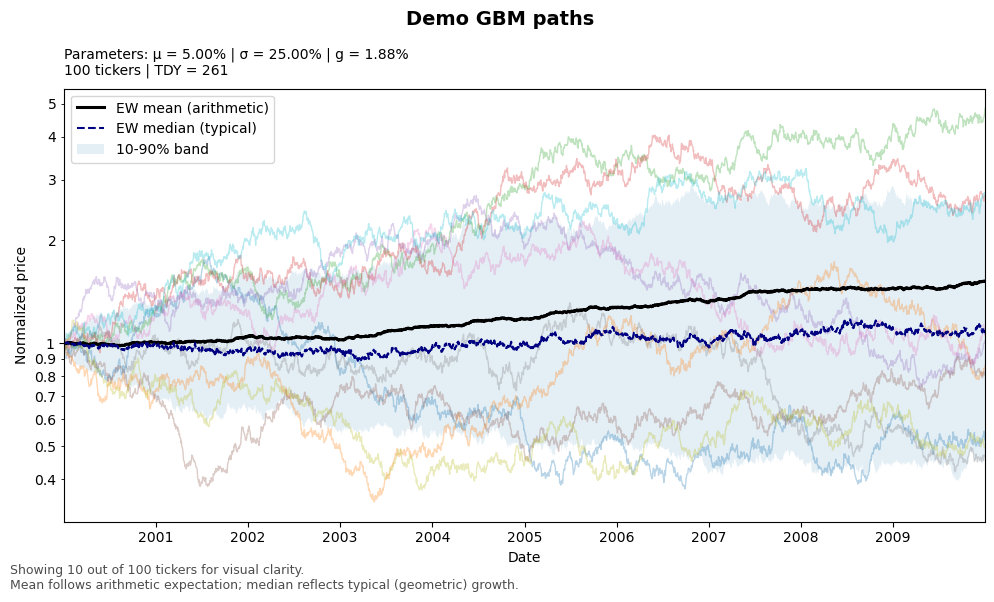

In [1]:
from mlbt.notebooks.demonstration import notebook_gbm_demo_universe
notebook_gbm_demo_universe()

## Positive skew

When examining the distirbutions of $S(t)$ and $\ln{S(t)}$ at a fixed time $t$, we encounter a fundamental property of the GBM.

While $\ln{S(t)}$ is normally distributed and therefore symmetric around its mean, $S(t)$'s log-normal distribution is **positively skewed** (right-skewed): it has a long right tail and is no longer symmetric around the mean.

A key property of positively skewed distributions is the ordering
$$
\mathrm{mode} < \mathrm{median} < \mathrm{mean}.
$$

Intuitively: although extreme upward price movements are relatively rare, they exert a disproportionate pull on the arithmetic mean. Consequently, more than 50% of simulated prices fall below the mean, and the most probable price lies below it as well. In other words, in the vanilla GBM world, even though we can compute the expected price at time $t$, the likelihood of actually realizing a price below this expected value is greater than 50 %.


The figure below shows these distributions for both $\ln{S(t)}$ (symmetric) and $S(t)$ (right-skewed), with vertical markers for the mean, median, and mode.

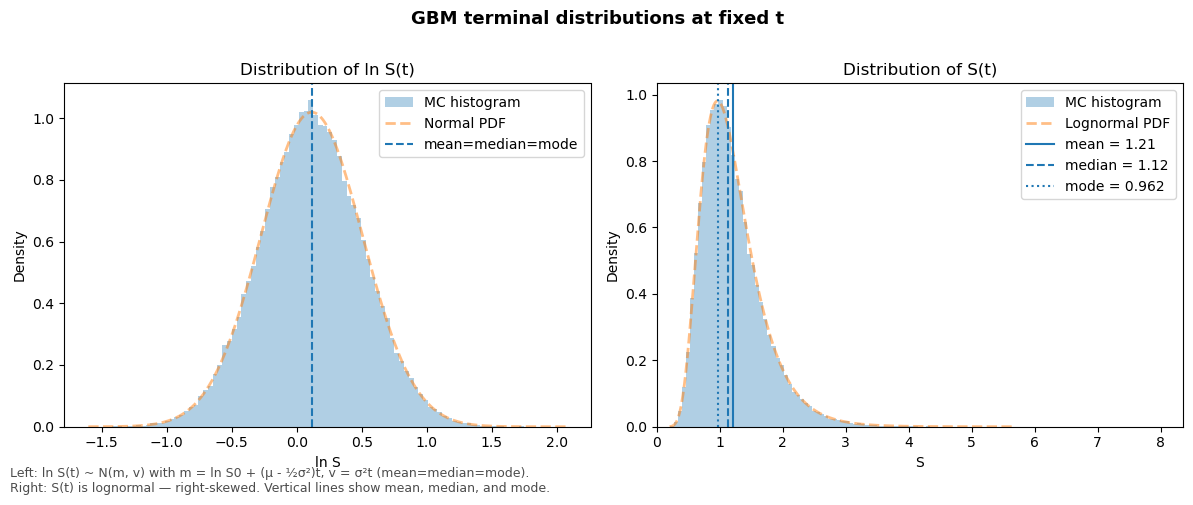

In [2]:
from mlbt.visualisation import plot_gbm_distribution
_ = plot_gbm_distribution(t=1000/261, mu=0.05, sigma=0.2)